In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore')

In [205]:
cabs=pd.read_csv('YourCabs_training.csv')

In [206]:
cabs.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01/01/2013 02:00,NaN,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01/01/2013 09:00,NaN,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01/01/2013 03:30,NaN,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01/01/2013 05:45,NaN,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01/01/2013 09:00,NaN,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [207]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [208]:
#cabs['Car_Cancellation']=cabs['Car_Cancellation'].astype('str')

In [209]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

## Data filtering 
We will be filtering the data for travel_type_id =2 as the other two travel had around 4% of car cancellation rate. There is not enough data hence it is not statistically analysable and they are not affecting the business. This is underfitting and class imbalance where for ex we have 43000 cancelleations and 300 bookings.

In [210]:
cabs['travel_type_id'].value_counts()

2    34292
3     7550
1     1589
Name: travel_type_id, dtype: int64

In [211]:
cabs=cabs[cabs['travel_type_id']==2]

### Drop the columns with more than 10% NULL values

In [212]:
cabs.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [213]:
cabs.drop(['id', 'user_id', 'vehicle_model_id', 'package_id', 'from_city_id', 'to_city_id', 'to_date'],axis=1,inplace=True)

In [214]:
cabs.columns

Index(['travel_type_id', 'from_area_id', 'to_area_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [215]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       34292 non-null  int64  
 1   from_area_id         34292 non-null  float64
 2   to_area_id           34292 non-null  float64
 3   from_date            34292 non-null  object 
 4   online_booking       34292 non-null  int64  
 5   mobile_site_booking  34292 non-null  int64  
 6   booking_created      34292 non-null  object 
 7   from_lat             34292 non-null  float64
 8   from_long            34292 non-null  float64
 9   to_lat               34292 non-null  float64
 10  to_long              34292 non-null  float64
 11  Car_Cancellation     34292 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 3.4+ MB


## Transformation

### Transform from_area_id to high, med,low

In [216]:
total_cancel_fai=cabs.groupby(['from_area_id'])['Car_Cancellation'].sum()
total_cancel_fai

from_area_id
2.0       4
6.0       0
15.0      0
16.0      0
22.0      2
         ..
1395.0    5
1398.0    3
1399.0    9
1401.0    2
1403.0    0
Name: Car_Cancellation, Length: 586, dtype: int64

In [217]:
total_booking_fai=cabs.groupby(['from_area_id'])['Car_Cancellation'].count()
total_booking_fai

from_area_id
2.0       25
6.0        6
15.0       6
16.0       4
22.0      18
          ..
1395.0    28
1398.0    12
1399.0    83
1401.0     5
1403.0     1
Name: Car_Cancellation, Length: 586, dtype: int64

In [218]:
cabs['cancellation_perc']=round(total_cancel_fai/total_booking_fai,2)
cabs['cancellation_perc']
cabs['cancellation_perc'].replace(np.nan,0,True)

In [219]:
cond=[(cabs['cancellation_perc'].between(0.0,0.33)),
      (cabs['cancellation_perc'].between(0.34,0.66)),
      (cabs['cancellation_perc'].between(0.67,1.0))]

values=['Low','Medium','High']
cabs['Cancellation_density']=np.select(cond,values)

In [220]:
cabs['Cancellation_density'].value_counts()

Low       34272
Medium       16
High          4
Name: Cancellation_density, dtype: int64

In [221]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   travel_type_id        34292 non-null  int64  
 1   from_area_id          34292 non-null  float64
 2   to_area_id            34292 non-null  float64
 3   from_date             34292 non-null  object 
 4   online_booking        34292 non-null  int64  
 5   mobile_site_booking   34292 non-null  int64  
 6   booking_created       34292 non-null  object 
 7   from_lat              34292 non-null  float64
 8   from_long             34292 non-null  float64
 9   to_lat                34292 non-null  float64
 10  to_long               34292 non-null  float64
 11  Car_Cancellation      34292 non-null  int64  
 12  cancellation_perc     34292 non-null  float64
 13  Cancellation_density  34292 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 3.9+ MB


In [222]:
cabs.head(1000)

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancellation_perc,Cancellation_density
0,2,83.0,448.0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0.00,Low
1,2,1010.0,540.0,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,0.00,Low
2,2,1301.0,1034.0,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,0.16,Low
3,2,768.0,398.0,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,0.00,Low
4,2,1365.0,849.0,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,0.00,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2,1017.0,243.0,1/15/2013 18:00,0,0,1/15/2013 17:33,13.110840,77.600740,13.243730,77.709150,0,0.00,Low
1239,2,448.0,393.0,1/16/2013 3:00,0,0,1/15/2013 17:36,12.927320,77.635750,13.199560,77.706880,0,0.08,Low
1240,2,1010.0,1282.0,1/16/2013 2:30,0,0,1/15/2013 17:59,12.966910,77.749350,12.959687,77.747099,0,0.00,Low
1242,2,363.0,393.0,1/15/2013 19:00,0,0,1/15/2013 18:30,12.992870,77.716620,13.199560,77.706880,0,0.25,Low


In [223]:
pd.qcut(cabs['cancellation_perc'].rank(method='first'),3)

0          (0.999, 11431.333]
1          (0.999, 11431.333]
2        (22861.667, 34292.0]
3          (0.999, 11431.333]
4          (0.999, 11431.333]
                 ...         
43425    (22861.667, 34292.0]
43426    (22861.667, 34292.0]
43427    (22861.667, 34292.0]
43429    (22861.667, 34292.0]
43430    (22861.667, 34292.0]
Name: cancellation_perc, Length: 34292, dtype: category
Categories (3, interval[float64]): [(0.999, 11431.333] < (11431.333, 22861.667] < (22861.667, 34292.0]]

In [224]:
temp=cabs[cabs['cancellation_perc']!=0]['cancellation_perc']
temp.describe()

count    320.000000
mean       0.140437
std        0.128113
min        0.010000
25%        0.060000
50%        0.100000
75%        0.170000
max        1.000000
Name: cancellation_perc, dtype: float64

In [225]:
#lets bin the temp
pd.qcut(temp,3)

2                        (0.14, 1.0]
22                      (0.08, 0.14]
25      (0.009000000000000001, 0.08]
49                       (0.14, 1.0]
52      (0.009000000000000001, 0.08]
                    ...             
1388    (0.009000000000000001, 0.08]
1390                    (0.08, 0.14]
1395                     (0.14, 1.0]
1398                     (0.14, 1.0]
1399                    (0.08, 0.14]
Name: cancellation_perc, Length: 320, dtype: category
Categories (3, interval[float64]): [(0.009000000000000001, 0.08] < (0.08, 0.14] < (0.14, 1.0]]

In [226]:
cond=[(cabs['cancellation_perc'].between(0.0,0.0)),
      (cabs['cancellation_perc'].between(0.01,0.08)),
      (cabs['cancellation_perc'].between(0.08,0.14)),
      (cabs['cancellation_perc'].between(0.14,1.0))]

values=['No_Cancelln','Low','Medium','High']
cabs['Cancellation_density']=np.select(cond,values)

In [227]:
cabs.head(1000)

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancellation_perc,Cancellation_density
0,2,83.0,448.0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0.00,No_Cancelln
1,2,1010.0,540.0,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,0.00,No_Cancelln
2,2,1301.0,1034.0,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,0.16,High
3,2,768.0,398.0,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,0.00,No_Cancelln
4,2,1365.0,849.0,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,0.00,No_Cancelln
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2,1017.0,243.0,1/15/2013 18:00,0,0,1/15/2013 17:33,13.110840,77.600740,13.243730,77.709150,0,0.00,No_Cancelln
1239,2,448.0,393.0,1/16/2013 3:00,0,0,1/15/2013 17:36,12.927320,77.635750,13.199560,77.706880,0,0.08,Low
1240,2,1010.0,1282.0,1/16/2013 2:30,0,0,1/15/2013 17:59,12.966910,77.749350,12.959687,77.747099,0,0.00,No_Cancelln
1242,2,363.0,393.0,1/15/2013 19:00,0,0,1/15/2013 18:30,12.992870,77.716620,13.199560,77.706880,0,0.25,High


In [228]:
cabs.drop(['travel_type_id','from_area_id','to_area_id','cancellation_perc'], axis=1,inplace=True)

In [229]:
cabs.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cancellation_density
0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,No_Cancelln
1,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,No_Cancelln
2,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,High
3,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,No_Cancelln
4,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,No_Cancelln


In [230]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   from_date             34292 non-null  object 
 1   online_booking        34292 non-null  int64  
 2   mobile_site_booking   34292 non-null  int64  
 3   booking_created       34292 non-null  object 
 4   from_lat              34292 non-null  float64
 5   from_long             34292 non-null  float64
 6   to_lat                34292 non-null  float64
 7   to_long               34292 non-null  float64
 8   Car_Cancellation      34292 non-null  int64  
 9   Cancellation_density  34292 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 2.9+ MB


## Date transformation
### from_date
Transform from_date column using datetime() method and then extract month, day and weekday.

In [231]:
cabs['from_date_new']=pd.to_datetime(cabs['from_date'])

In [232]:
cabs.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cancellation_density,from_date_new
0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,No_Cancelln,2013-01-01 02:00:00
1,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,No_Cancelln,2013-01-01 09:00:00
2,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,High,2013-01-01 03:30:00
3,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,No_Cancelln,2013-01-01 05:45:00
4,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,No_Cancelln,2013-01-01 09:00:00


In [233]:
cabs['Month_of_travel']=cabs['from_date_new'].dt.month_name()
cabs['Day_of_travel']=cabs['from_date_new'].dt.day_name()
cabs['Day_of_travel']=cabs['from_date_new'].dt.day_name()
cabs['Weekday of travel']=np.where((cabs['Day_of_travel']=='Saturday')|(cabs['Day_of_travel']=='Sunday'),'Weekend','Weekday')

### Booking_created
Transform booking_created column using datetime() method and then extract month, day and weekday.

In [234]:
cabs['Month_of_booking']=pd.to_datetime(cabs['booking_created']).dt.month_name()
cabs['Day_of_booking']=pd.to_datetime(cabs['booking_created']).dt.day_name()
cabs['Weekday of booking']=np.where((cabs['Day_of_booking']=='Saturday')|(cabs['Day_of_travel']=='Sunday'),'Weekend','Weekday')

In [235]:
cabs.head(-30)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cancellation_density,from_date_new,Month_of_travel,Day_of_travel,Weekday of travel,Month_of_booking,Day_of_booking,Weekday of booking
0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,No_Cancelln,2013-01-01 02:00:00,January,Tuesday,Weekday,January,Tuesday,Weekday
1,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,No_Cancelln,2013-01-01 09:00:00,January,Tuesday,Weekday,January,Tuesday,Weekday
2,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,High,2013-01-01 03:30:00,January,Tuesday,Weekday,January,Tuesday,Weekday
3,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,No_Cancelln,2013-01-01 05:45:00,January,Tuesday,Weekday,January,Tuesday,Weekday
4,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,No_Cancelln,2013-01-01 09:00:00,January,Tuesday,Weekday,January,Tuesday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43371,11/24/2013 11:15,0,1,11/23/2013 22:02,12.999874,77.678120,12.912695,77.576265,0,No_Cancelln,2013-11-24 11:15:00,November,Sunday,Weekend,November,Saturday,Weekend
43372,11/24/2013 7:45,1,0,11/23/2013 22:08,12.956410,77.640760,12.986350,77.582030,1,No_Cancelln,2013-11-24 07:45:00,November,Sunday,Weekend,November,Saturday,Weekend
43375,11/29/2013 4:30,1,0,11/23/2013 22:27,12.924150,77.672290,13.199560,77.706880,0,No_Cancelln,2013-11-29 04:30:00,November,Friday,Weekday,November,Saturday,Weekend
43376,11/24/2013 1:15,0,1,11/23/2013 22:30,12.937110,77.601710,12.951850,77.696420,0,No_Cancelln,2013-11-24 01:15:00,November,Sunday,Weekend,November,Saturday,Weekend


## Time coordinates transformation

In [236]:
import datetime
print(dir(datetime))

['MAXYEAR', 'MINYEAR', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'sys', 'time', 'timedelta', 'timezone', 'tzinfo']


In [237]:
#from datetime import datetime

In [238]:
cabs['Hour_of_travel']= cabs['from_date_new'].dt.hour

### Creating different timezones of the day for the day of travel column.




In [239]:
cabs.head(50)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cancellation_density,from_date_new,Month_of_travel,Day_of_travel,Weekday of travel,Month_of_booking,Day_of_booking,Weekday of booking,Hour_of_travel
0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,No_Cancelln,2013-01-01 02:00:00,January,Tuesday,Weekday,January,Tuesday,Weekday,2
1,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,No_Cancelln,2013-01-01 09:00:00,January,Tuesday,Weekday,January,Tuesday,Weekday,9
2,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,High,2013-01-01 03:30:00,January,Tuesday,Weekday,January,Tuesday,Weekday,3
3,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,No_Cancelln,2013-01-01 05:45:00,January,Tuesday,Weekday,January,Tuesday,Weekday,5
4,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,No_Cancelln,2013-01-01 09:00:00,January,Tuesday,Weekday,January,Tuesday,Weekday,9
5,01/01/2013 22:30,0,0,01/01/2013 08:01,13.028530,77.546250,12.869805,77.653211,0,No_Cancelln,2013-01-01 22:30:00,January,Tuesday,Weekday,January,Tuesday,Weekday,22
7,01/01/2013 11:00,0,0,01/01/2013 09:39,12.976770,77.572700,12.880190,77.645580,0,No_Cancelln,2013-01-01 11:00:00,January,Tuesday,Weekday,January,Tuesday,Weekday,11
9,01/01/2013 11:00,0,0,01/01/2013 09:49,13.005600,77.657990,12.902450,77.660810,0,No_Cancelln,2013-01-01 11:00:00,January,Tuesday,Weekday,January,Tuesday,Weekday,11
10,01/01/2013 11:00,0,0,01/01/2013 09:55,12.897240,77.610650,13.015080,77.677960,0,No_Cancelln,2013-01-01 11:00:00,January,Tuesday,Weekday,January,Tuesday,Weekday,11
11,01/01/2013 12:45,0,0,01/01/2013 09:59,12.999874,77.678120,12.953434,77.706510,0,No_Cancelln,2013-01-01 12:45:00,January,Tuesday,Weekday,January,Tuesday,Weekday,12


In [240]:
cond=[(cabs['Hour_of_travel'].between(5,8)),
       (cabs['Hour_of_travel'].between(9,12)),
      (cabs['Hour_of_travel'].between(13,16)),
      (cabs['Hour_of_travel'].between(17,20)),
      (cabs['Hour_of_travel'].between(21,24)),
      (cabs['Hour_of_travel'].between(1,4))]
values=['Early Morning','Morning','Afternoon','Evening','Night','Late Night']

cabs['Day_of_travel']=np.select(cond,values)

In [241]:
cabs.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cancellation_density,from_date_new,Month_of_travel,Day_of_travel,Weekday of travel,Month_of_booking,Day_of_booking,Weekday of booking,Hour_of_travel
0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,No_Cancelln,2013-01-01 02:00:00,January,Late Night,Weekday,January,Tuesday,Weekday,2
1,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,No_Cancelln,2013-01-01 09:00:00,January,Morning,Weekday,January,Tuesday,Weekday,9
2,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,High,2013-01-01 03:30:00,January,Late Night,Weekday,January,Tuesday,Weekday,3
3,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,No_Cancelln,2013-01-01 05:45:00,January,Early Morning,Weekday,January,Tuesday,Weekday,5
4,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,No_Cancelln,2013-01-01 09:00:00,January,Morning,Weekday,January,Tuesday,Weekday,9


### Creating different time zones from booking created column

In [242]:
cabs['booking_created_new']=pd.to_datetime(cabs['booking_created'])

In [243]:
cabs.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cancellation_density,from_date_new,Month_of_travel,Day_of_travel,Weekday of travel,Month_of_booking,Day_of_booking,Weekday of booking,Hour_of_travel,booking_created_new
0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,No_Cancelln,2013-01-01 02:00:00,January,Late Night,Weekday,January,Tuesday,Weekday,2,2013-01-01 01:39:00
1,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,No_Cancelln,2013-01-01 09:00:00,January,Morning,Weekday,January,Tuesday,Weekday,9,2013-01-01 02:25:00
2,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,High,2013-01-01 03:30:00,January,Late Night,Weekday,January,Tuesday,Weekday,3,2013-01-01 03:08:00
3,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,No_Cancelln,2013-01-01 05:45:00,January,Early Morning,Weekday,January,Tuesday,Weekday,5,2013-01-01 04:39:00
4,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,No_Cancelln,2013-01-01 09:00:00,January,Morning,Weekday,January,Tuesday,Weekday,9,2013-01-01 07:53:00


In [244]:
cabs['Hour_of_booking']= cabs['booking_created_new'].dt.hour

In [245]:
cond=[(cabs['Hour_of_booking'].between(5,8)),
       (cabs['Hour_of_booking'].between(9,12)),
      (cabs['Hour_of_booking'].between(13,16)),
      (cabs['Hour_of_booking'].between(17,20)),
      (cabs['Hour_of_booking'].between(21,24)),
      (cabs['Hour_of_booking'].between(1,4))]
values=['Early Morning','Morning','Afternoon','Evening','Night','Late Night']

cabs['Day_of_booking']=np.select(cond,values)

In [246]:
cabs.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cancellation_density,from_date_new,Month_of_travel,Day_of_travel,Weekday of travel,Month_of_booking,Day_of_booking,Weekday of booking,Hour_of_travel,booking_created_new,Hour_of_booking
0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,No_Cancelln,2013-01-01 02:00:00,January,Late Night,Weekday,January,Late Night,Weekday,2,2013-01-01 01:39:00,1
1,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,No_Cancelln,2013-01-01 09:00:00,January,Morning,Weekday,January,Late Night,Weekday,9,2013-01-01 02:25:00,2
2,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,High,2013-01-01 03:30:00,January,Late Night,Weekday,January,Late Night,Weekday,3,2013-01-01 03:08:00,3
3,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,No_Cancelln,2013-01-01 05:45:00,January,Early Morning,Weekday,January,Late Night,Weekday,5,2013-01-01 04:39:00,4
4,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,No_Cancelln,2013-01-01 09:00:00,January,Morning,Weekday,January,Early Morning,Weekday,9,2013-01-01 07:53:00,7


In [247]:
cabs['Time_diff in mins']=round((cabs['from_date_new']-cabs['booking_created_new']).dt.seconds/60,2)
cabs.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cancellation_density,from_date_new,Month_of_travel,Day_of_travel,Weekday of travel,Month_of_booking,Day_of_booking,Weekday of booking,Hour_of_travel,booking_created_new,Hour_of_booking,Time_diff in mins
0,01/01/2013 02:00,0,0,01/01/2013 01:39,12.924150,77.672290,12.927320,77.635750,0,No_Cancelln,2013-01-01 02:00:00,January,Late Night,Weekday,January,Late Night,Weekday,2,2013-01-01 01:39:00,1,21.0
1,01/01/2013 09:00,0,0,01/01/2013 02:25,12.966910,77.749350,12.927680,77.626640,0,No_Cancelln,2013-01-01 09:00:00,January,Morning,Weekday,January,Late Night,Weekday,9,2013-01-01 02:25:00,2,395.0
2,01/01/2013 03:30,0,0,01/01/2013 03:08,12.937222,77.626915,13.047926,77.597766,0,High,2013-01-01 03:30:00,January,Late Night,Weekday,January,Late Night,Weekday,3,2013-01-01 03:08:00,3,22.0
3,01/01/2013 05:45,0,0,01/01/2013 04:39,12.989990,77.553320,12.971430,77.639140,0,No_Cancelln,2013-01-01 05:45:00,January,Early Morning,Weekday,January,Late Night,Weekday,5,2013-01-01 04:39:00,4,66.0
4,01/01/2013 09:00,0,0,01/01/2013 07:53,12.845653,77.677925,12.954340,77.600720,0,No_Cancelln,2013-01-01 09:00:00,January,Morning,Weekday,January,Early Morning,Weekday,9,2013-01-01 07:53:00,7,67.0


In [248]:
cabs.drop(['from_date','from_date_new','booking_created','booking_created_new'],axis=1,inplace=True)

In [249]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   online_booking        34292 non-null  int64  
 1   mobile_site_booking   34292 non-null  int64  
 2   from_lat              34292 non-null  float64
 3   from_long             34292 non-null  float64
 4   to_lat                34292 non-null  float64
 5   to_long               34292 non-null  float64
 6   Car_Cancellation      34292 non-null  int64  
 7   Cancellation_density  34292 non-null  object 
 8   Month_of_travel       34292 non-null  object 
 9   Day_of_travel         34292 non-null  object 
 10  Weekday of travel     34292 non-null  object 
 11  Month_of_booking      34292 non-null  object 
 12  Day_of_booking        34292 non-null  object 
 13  Weekday of booking    34292 non-null  object 
 14  Hour_of_travel        34292 non-null  int64  
 15  Hour_of_booking    

In [250]:
from geopy import distance

In [251]:
# def cal_distance(from_lat,from_long,to_lat,to_long):
#   return distance.distance((from_lat,from_long),(to_lat,to_long)).km


In [252]:
#cabs['distance'] =cabs.apply(lambda x: cal_distance(x['from_lat'],x['from_long'],x['to_lat'],x['to_long']),axis=1)

In [253]:
cabs['distance'] =cabs.apply(lambda x: distance.distance(
                    (x['from_lat'],x['from_long']),
                    (x['to_lat'],x['to_long'])).km,axis=1)

In [254]:
cabs.head()

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cancellation_density,Month_of_travel,Day_of_travel,Weekday of travel,Month_of_booking,Day_of_booking,Weekday of booking,Hour_of_travel,Hour_of_booking,Time_diff in mins,distance
0,0,0,12.924150,77.672290,12.927320,77.635750,0,No_Cancelln,January,Late Night,Weekday,January,Late Night,Weekday,2,1,21.0,3.980687
1,0,0,12.966910,77.749350,12.927680,77.626640,0,No_Cancelln,January,Morning,Weekday,January,Late Night,Weekday,9,2,395.0,14.004432
2,0,0,12.937222,77.626915,13.047926,77.597766,0,High,January,Late Night,Weekday,January,Late Night,Weekday,3,3,22.0,12.648909
3,0,0,12.989990,77.553320,12.971430,77.639140,0,No_Cancelln,January,Early Morning,Weekday,January,Late Night,Weekday,5,4,66.0,9.534596
4,0,0,12.845653,77.677925,12.954340,77.600720,0,No_Cancelln,January,Morning,Weekday,January,Early Morning,Weekday,9,7,67.0,14.655467


In [255]:
cabs.drop(['from_lat','from_long','to_lat','to_long'],axis=1,inplace=True)

In [256]:
cabs.head()

,online_booking,mobile_site_booking,Car_Cancellation,Cancellation_density,Month_of_travel,Day_of_travel,Weekday of travel,Month_of_booking,Day_of_booking,Weekday of booking,Hour_of_travel,Hour_of_booking,Time_diff in mins,distance
0,0,0,0,No_Cancelln,January,Late Night,Weekday,January,Late Night,Weekday,2,1,21.0,3.980687
1,0,0,0,No_Cancelln,January,Morning,Weekday,January,Late Night,Weekday,9,2,395.0,14.004432
2,0,0,0,High,January,Late Night,Weekday,January,Late Night,Weekday,3,3,22.0,12.648909
3,0,0,0,No_Cancelln,January,Early Morning,Weekday,January,Late Night,Weekday,5,4,66.0,9.534596
4,0,0,0,No_Cancelln,January,Morning,Weekday,January,Early Morning,Weekday,9,7,67.0,14.655467


## Visualisations
### Taking only the categorical variables


In [257]:
cabs.columns

Index(['online_booking', 'mobile_site_booking', 'Car_Cancellation',
       'Cancellation_density', 'Month_of_travel', 'Day_of_travel',
       'Weekday of travel', 'Month_of_booking', 'Day_of_booking',
       'Weekday of booking', 'Hour_of_travel', 'Hour_of_booking',
       'Time_diff in mins', 'distance'],
      dtype='object')

In [258]:
cabs_char=cabs.drop(['online_booking', 'mobile_site_booking','Hour_of_travel', 'Hour_of_booking',
       'Time_diff in mins', 'distance', 'Car_Cancellation'],axis=1,inplace=False)

In [259]:
cabs_char.columns

Index(['Cancellation_density', 'Month_of_travel', 'Day_of_travel',
       'Weekday of travel', 'Month_of_booking', 'Day_of_booking',
       'Weekday of booking'],
      dtype='object')

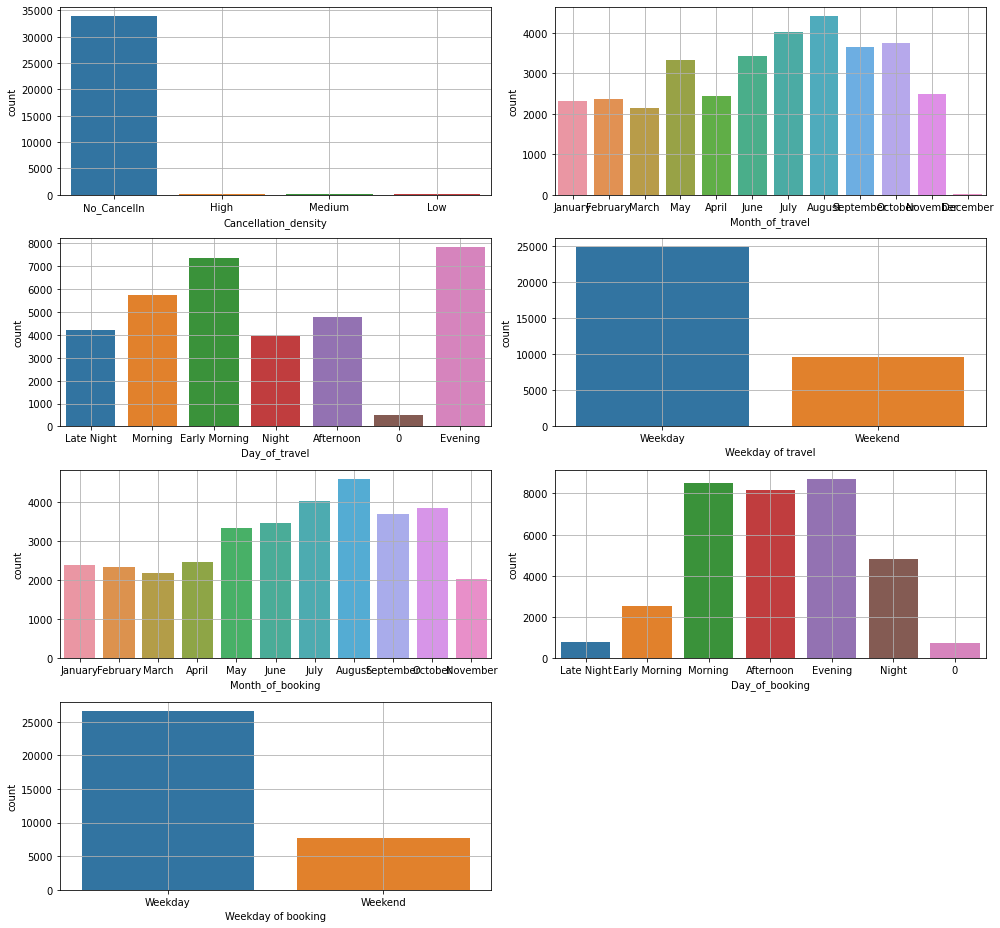

In [260]:
plt.figure(figsize=(14,13))
for i, col in enumerate(list(cabs_char.columns.values)):
  plt.subplot(4,2,i+1)
  sns.countplot(cabs_char[col], label='wine')
  plt.grid()
  plt.tight_layout()


In [261]:
cabs_char['Cancellation_density'].value_counts()

No_Cancelln    33972
Low              120
High             100
Medium           100
Name: Cancellation_density, dtype: int64

### Taking the numerical features now

In [262]:
cabs_num=cabs[['online_booking', 'mobile_site_booking','Hour_of_travel', 'Hour_of_booking',
       'Time_diff in mins', 'distance', 'Car_Cancellation']]

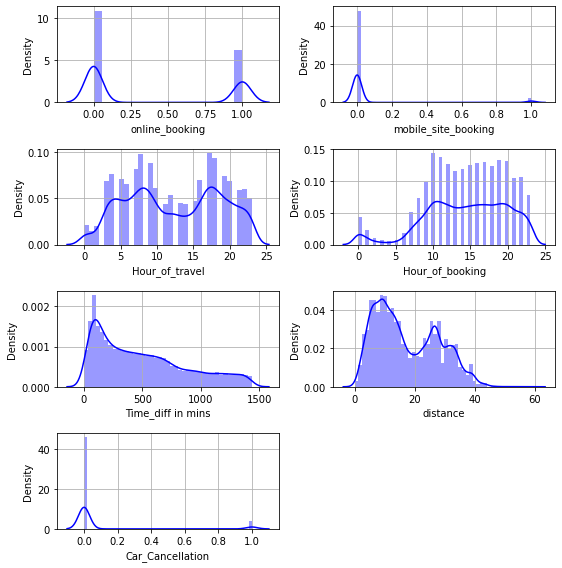

In [263]:
plt.figure(figsize=(8,8))
for i,col in enumerate(list(cabs_num.columns.values)):
    plt.subplot(4,2,i+1)
    sns.distplot(cabs_num[col], kde=True, color='b')
    plt.grid()
    plt.tight_layout()

In [264]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   online_booking        34292 non-null  int64  
 1   mobile_site_booking   34292 non-null  int64  
 2   Car_Cancellation      34292 non-null  int64  
 3   Cancellation_density  34292 non-null  object 
 4   Month_of_travel       34292 non-null  object 
 5   Day_of_travel         34292 non-null  object 
 6   Weekday of travel     34292 non-null  object 
 7   Month_of_booking      34292 non-null  object 
 8   Day_of_booking        34292 non-null  object 
 9   Weekday of booking    34292 non-null  object 
 10  Hour_of_travel        34292 non-null  int64  
 11  Hour_of_booking       34292 non-null  int64  
 12  Time_diff in mins     34292 non-null  float64
 13  distance              34292 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 4.9+ MB


In [265]:
cabs_char_dum = pd.get_dummies(cabs_char,drop_first=True)
pd.set_option('display.max_columns',None)
cabs_char_dum.head()

,Cancellation_density_Low,Cancellation_density_Medium,Cancellation_density_No_Cancelln,Month_of_travel_August,Month_of_travel_December,Month_of_travel_February,Month_of_travel_January,Month_of_travel_July,Month_of_travel_June,Month_of_travel_March,Month_of_travel_May,Month_of_travel_November,Month_of_travel_October,Month_of_travel_September,Day_of_travel_Afternoon,Day_of_travel_Early Morning,Day_of_travel_Evening,Day_of_travel_Late Night,Day_of_travel_Morning,Day_of_travel_Night,Weekday of travel_Weekend,Month_of_booking_August,Month_of_booking_February,Month_of_booking_January,Month_of_booking_July,Month_of_booking_June,Month_of_booking_March,Month_of_booking_May,Month_of_booking_November,Month_of_booking_October,Month_of_booking_September,Day_of_booking_Afternoon,Day_of_booking_Early Morning,Day_of_booking_Evening,Day_of_booking_Late Night,Day_of_booking_Morning,Day_of_booking_Night,Weekday of booking_Weekend
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [266]:
cabs1=pd.concat([cabs_num, cabs_char_dum], axis=1, join="inner")
cabs1.head()

,online_booking,mobile_site_booking,Hour_of_travel,Hour_of_booking,Time_diff in mins,distance,Car_Cancellation,Cancellation_density_Low,Cancellation_density_Medium,Cancellation_density_No_Cancelln,Month_of_travel_August,Month_of_travel_December,Month_of_travel_February,Month_of_travel_January,Month_of_travel_July,Month_of_travel_June,Month_of_travel_March,Month_of_travel_May,Month_of_travel_November,Month_of_travel_October,Month_of_travel_September,Day_of_travel_Afternoon,Day_of_travel_Early Morning,Day_of_travel_Evening,Day_of_travel_Late Night,Day_of_travel_Morning,Day_of_travel_Night,Weekday of travel_Weekend,Month_of_booking_August,Month_of_booking_February,Month_of_booking_January,Month_of_booking_July,Month_of_booking_June,Month_of_booking_March,Month_of_booking_May,Month_of_booking_November,Month_of_booking_October,Month_of_booking_September,Day_of_booking_Afternoon,Day_of_booking_Early Morning,Day_of_booking_Evening,Day_of_booking_Late Night,Day_of_booking_Morning,Day_of_booking_Night,Weekday of booking_Weekend
0,0,0,2,1,21.0,3.980687,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,9,2,395.0,14.004432,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,3,3,22.0,12.648909,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,5,4,66.0,9.534596,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,9,7,67.0,14.655467,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [267]:
cabs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   online_booking                    34292 non-null  int64  
 1   mobile_site_booking               34292 non-null  int64  
 2   Hour_of_travel                    34292 non-null  int64  
 3   Hour_of_booking                   34292 non-null  int64  
 4   Time_diff in mins                 34292 non-null  float64
 5   distance                          34292 non-null  float64
 6   Car_Cancellation                  34292 non-null  int64  
 7   Cancellation_density_Low          34292 non-null  uint8  
 8   Cancellation_density_Medium       34292 non-null  uint8  
 9   Cancellation_density_No_Cancelln  34292 non-null  uint8  
 10  Month_of_travel_August            34292 non-null  uint8  
 11  Month_of_travel_December          34292 non-null  uint8  
 12  Mont

### Standardization

In [268]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cabs1.drop('Car_Cancellation',axis=1))
scaled_features

array([[-0.75498526, -0.22475807, -1.60500953, ..., -0.57483604,
        -0.40538277, -0.53662132],
       [-0.75498526, -0.22475807, -0.51070495, ..., -0.57483604,
        -0.40538277, -0.53662132],
       [-0.75498526, -0.22475807, -1.44868031, ..., -0.57483604,
        -0.40538277, -0.53662132],
       ...,
       [ 1.32452917, -0.22475807, -1.76133876, ..., -0.57483604,
        -0.40538277, -0.53662132],
       [-0.75498526, -0.22475807,  0.58359963, ..., -0.57483604,
        -0.40538277,  1.8635115 ],
       [-0.75498526,  4.44922844, -1.13602186, ..., -0.57483604,
        -0.40538277, -0.53662132]])

In [269]:
cabs_feat=pd.DataFrame(scaled_features,columns=cabs1.columns.drop(['Car_Cancellation']))
cabs_feat.head()

,online_booking,mobile_site_booking,Hour_of_travel,Hour_of_booking,Time_diff in mins,distance,Cancellation_density_Low,Cancellation_density_Medium,Cancellation_density_No_Cancelln,Month_of_travel_August,Month_of_travel_December,Month_of_travel_February,Month_of_travel_January,Month_of_travel_July,Month_of_travel_June,Month_of_travel_March,Month_of_travel_May,Month_of_travel_November,Month_of_travel_October,Month_of_travel_September,Day_of_travel_Afternoon,Day_of_travel_Early Morning,Day_of_travel_Evening,Day_of_travel_Late Night,Day_of_travel_Morning,Day_of_travel_Night,Weekday of travel_Weekend,Month_of_booking_August,Month_of_booking_February,Month_of_booking_January,Month_of_booking_July,Month_of_booking_June,Month_of_booking_March,Month_of_booking_May,Month_of_booking_November,Month_of_booking_October,Month_of_booking_September,Day_of_booking_Afternoon,Day_of_booking_Early Morning,Day_of_booking_Evening,Day_of_booking_Late Night,Day_of_booking_Morning,Day_of_booking_Night,Weekday of booking_Weekend
0,-0.754985,-0.224758,-1.605010,-2.512456,-1.238470,-1.281337,-0.059259,-0.05408,0.097054,-0.384512,-0.021606,-0.271487,3.725215,-0.36436,-0.33235,-0.258696,-0.326967,-0.279452,-0.349562,-0.345134,-0.402404,-0.521858,-0.543243,2.678888,-0.447667,-0.360292,-0.620509,-0.392664,-0.270247,3.665059,-0.364771,-0.334725,-0.260807,-0.328223,-0.249857,-0.354637,-0.347668,-0.559432,-0.283014,-0.583142,6.571965,-0.574836,-0.405383,-0.536621
1,-0.754985,-0.224758,-0.510705,-2.325892,-0.267881,-0.318632,-0.059259,-0.05408,0.097054,-0.384512,-0.021606,-0.271487,3.725215,-0.36436,-0.33235,-0.258696,-0.326967,-0.279452,-0.349562,-0.345134,-0.402404,-0.521858,-0.543243,-0.373289,2.233801,-0.360292,-0.620509,-0.392664,-0.270247,3.665059,-0.364771,-0.334725,-0.260807,-0.328223,-0.249857,-0.354637,-0.347668,-0.559432,-0.283014,-0.583142,6.571965,-0.574836,-0.405383,-0.536621
2,-0.754985,-0.224758,-1.448680,-2.139327,-1.235875,-0.448819,-0.059259,-0.05408,-10.303519,-0.384512,-0.021606,-0.271487,3.725215,-0.36436,-0.33235,-0.258696,-0.326967,-0.279452,-0.349562,-0.345134,-0.402404,-0.521858,-0.543243,2.678888,-0.447667,-0.360292,-0.620509,-0.392664,-0.270247,3.665059,-0.364771,-0.334725,-0.260807,-0.328223,-0.249857,-0.354637,-0.347668,-0.559432,-0.283014,-0.583142,6.571965,-0.574836,-0.405383,-0.536621
3,-0.754985,-0.224758,-1.136022,-1.952762,-1.121688,-0.747926,-0.059259,-0.05408,0.097054,-0.384512,-0.021606,-0.271487,3.725215,-0.36436,-0.33235,-0.258696,-0.326967,-0.279452,-0.349562,-0.345134,-0.402404,1.916229,-0.543243,-0.373289,-0.447667,-0.360292,-0.620509,-0.392664,-0.270247,3.665059,-0.364771,-0.334725,-0.260807,-0.328223,-0.249857,-0.354637,-0.347668,-0.559432,-0.283014,-0.583142,6.571965,-0.574836,-0.405383,-0.536621
4,-0.754985,-0.224758,-0.510705,-1.393067,-1.119093,-0.256105,-0.059259,-0.05408,0.097054,-0.384512,-0.021606,-0.271487,3.725215,-0.36436,-0.33235,-0.258696,-0.326967,-0.279452,-0.349562,-0.345134,-0.402404,-0.521858,-0.543243,-0.373289,2.233801,-0.360292,-0.620509,-0.392664,-0.270247,3.665059,-0.364771,-0.334725,-0.260807,-0.328223,-0.249857,-0.354637,-0.347668,-0.559432,3.533392,-0.583142,-0.152161,-0.574836,-0.405383,-0.536621


### Logistic regression


In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X=cabs_feat # X contains the scaled features.
y=cabs['Car_Cancellation']
print(X.shape)
print(y.shape)

(34292, 44)
(34292,)


In [272]:
#print(X.head())
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64


In [273]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [274]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22861, 44)
(22861,)
(11431, 44)
(11431,)


In [275]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [276]:
y_pred=log_reg.predict(X_test)

In [277]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix  

array([[10397,    94],
       [  809,   131]], dtype=int64)

In [278]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10491
           1       0.58      0.14      0.22       940

    accuracy                           0.92     11431
   macro avg       0.76      0.57      0.59     11431
weighted avg       0.90      0.92      0.90     11431



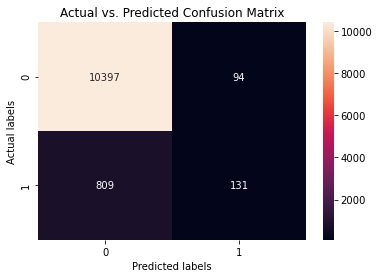

In [279]:
ax= plt.subplot()
sns.heatmap(conf_matrix ,annot=True, ax= ax, fmt='')

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1']);

plt.show()

In [280]:
coeff_df=pd.DataFrame(cabs_feat.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(log_reg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,online_booking,0.739577
1,mobile_site_booking,0.347336
2,Hour_of_travel,0.353300
3,Hour_of_booking,0.039977
4,Time_diff in mins,-0.415179
5,distance,-0.698449
6,Cancellation_density_Low,-0.261858
7,Cancellation_density_Medium,-0.013821
8,Cancellation_density_No_Cancelln,-0.026035
9,Month_of_travel_August,0.054652


In [281]:
print(y_test)
print(y_pred_proba)

6761     0
14941    0
42174    1
6382     0
12395    0
        ..
493      0
22244    0
39703    0
961      0
12340    0
Name: Car_Cancellation, Length: 11431, dtype: int64
[0.00316706 0.14628419 0.41366031 ... 0.10900715 0.00401021 0.02451111]


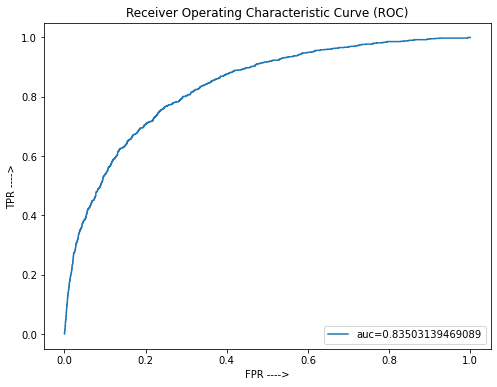

In [282]:
from sklearn import metrics

y_pred_proba = log_reg.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   


# metrics.roc_curve returns three outputs: fpr, tpr and different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

#metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Plotting the AUC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

## Decision tree

In [283]:
from sklearn.tree import DecisionTreeClassifier

In [284]:
X=cabs1.drop(['Car_Cancellation'], axis=1)
y=cabs1['Car_Cancellation']

In [285]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [287]:
dtc=DecisionTreeClassifier(random_state=32,max_depth=5)

In [295]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250], 'criterion': ['gini', 'entropy']}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc.fit(X_train,y_train)


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5,
                                              min_samples_split=250,
                                              random_state=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [298]:
gscv_dtc.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 250}

In [299]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=4,max_depth=5,min_samples_split=250)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=250, random_state=4)

In [300]:
y_pred_dtc=dtc.predict(X_test)

In [301]:
conf_matrix_dtc = confusion_matrix(y_test,y_pred_dtc)
conf_matrix_dtc  

array([[10434,    57],
       [  875,    65]], dtype=int64)

In [302]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10491
           1       0.53      0.07      0.12       940

    accuracy                           0.92     11431
   macro avg       0.73      0.53      0.54     11431
weighted avg       0.89      0.92      0.89     11431



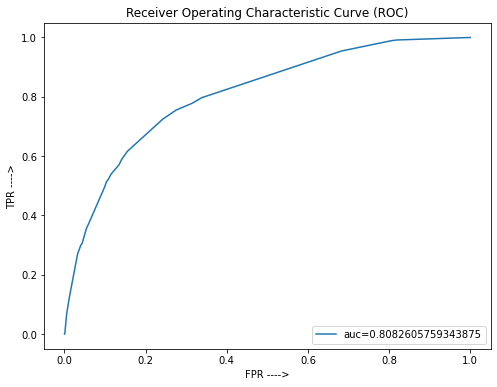

In [303]:
y_pred_proba = dtc.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   


# metrics.roc_curve returns three outputs: fpr, tpr and different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

#metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Plotting the AUC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

### Random Forest

In [304]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [305]:
X=cabs1.drop(['Car_Cancellation'], axis=1)
y=cabs1['Car_Cancellation']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [306]:
# Set the random state for reproducibility
rfc = RandomForestClassifier(random_state=42)

In [308]:
#Providing random seed so that the same result is obtained everytime
np.random.seed(42)

# Providing the different values of hyperparameters
param_dist = {'max_depth': [3, 4, 5, 6],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy'],
             'n_estimators': [100, 200, 300, 500, 1000]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(rfc, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = -1)
#n_jobs=3,-1
#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(X_train,y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'n_estimators': 300}


In [310]:
rfc.set_params(criterion = 'gini',
                  max_features = None, 
                  bootstrap = True,
                  max_depth = 6,
                  n_estimators=300)

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=300,
                       random_state=42)

In [313]:
# Working on the OOB rate, OOB rate by default is 'FALSE'

rfc.set_params(oob_score=True)

min_estimators = 10
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1,5):
    rfc.set_params(n_estimators=i)       #specifying the number of extimators or DTs
    rfc.fit(X_train,y_train)     #fit to the train dataset

    oob_error = 1 - rfc.oob_score_      #oob_score_ gives prediction score, subtract from 1 to find error
    error_rate[i] = oob_error

In [314]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
oob_series

10     0.079962
15     0.078562
20     0.078081
25     0.078256
30     0.078212
         ...   
480    0.077643
485    0.077599
490    0.077556
495    0.077468
500    0.077556
Length: 99, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes (From 10 to 500 trees)')

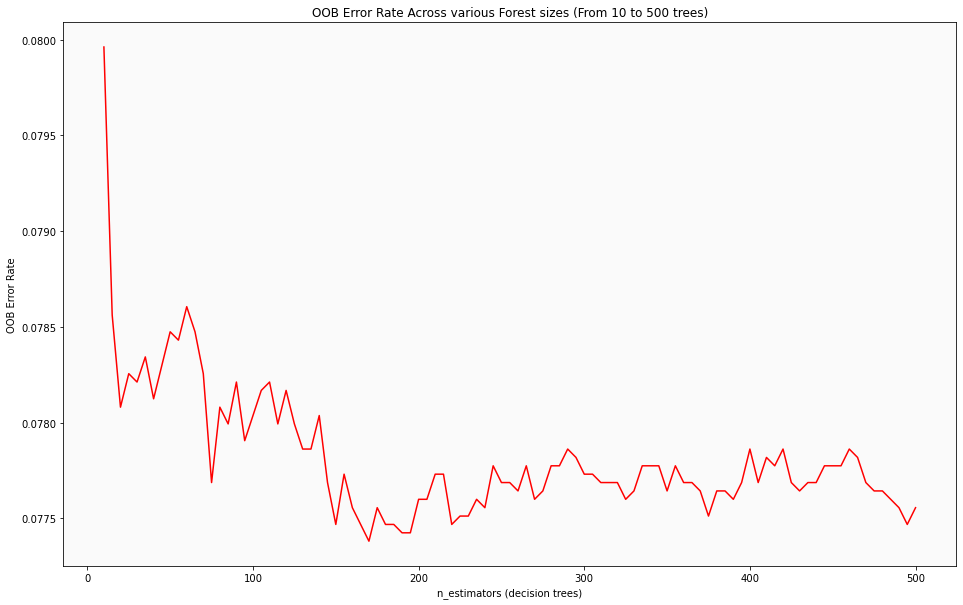

In [317]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
#plt.axhline(0.042, color='#875FDB',linestyle='--')
#plt.axhline(0.037, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators (decision trees)')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes (From 10 to 500 trees)')

In [318]:
print('OOB Error rate for 320 trees is: {0:.5f}'.format(oob_series[320]))

OOB Error rate for 320 trees is: 0.07769


In [320]:
rfc.set_params(n_estimators=320,
                  bootstrap = True,
                  oob_score=False)

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=320,
                       random_state=42)

In [322]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   

In [323]:
confusion_matrix(y_test,pred_rfc)

array([[10420,    71],
       [  832,   108]], dtype=int64)

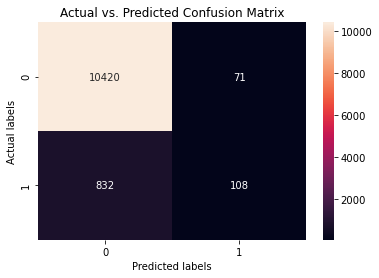

In [326]:
cm=confusion_matrix(y_test,pred_rfc)
ax= plt.subplot()
sns.heatmap(cm,annot=True, ax= ax, fmt='')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1']);

plt.show()

In [325]:
# classification: recall, precision, F1 score , Accuracy 
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10491
           1       0.60      0.11      0.19       940

    accuracy                           0.92     11431
   macro avg       0.76      0.55      0.58     11431
weighted avg       0.90      0.92      0.90     11431



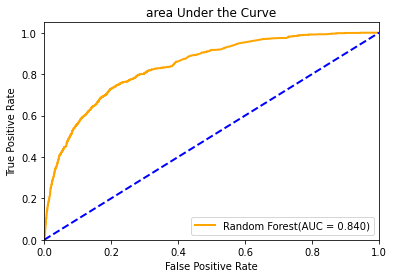

In [327]:
from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Random Forest(AUC = %0.3f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")